# Machine Learning in Python for developers
---
## Krzysztof Bujniewicz
@bujniewicz on github

# Opening notes
---

![QR](https://bujniewicz.github.io/mdm-ml-for-developers/mdm-ml-url.svg)
### slides are on https://bujniewicz.github.io/mdm-ml-for-developers/
### code is on https://github.com/bujniewicz/mdm-ml-for-developers/
### I'm a developer, not a data scientist

# What is "Machine Learning"?
---

### Magic?

### Maths?

# What is "Machine Learning"?
---

### Practical application of Artificial Intelligence

# How to Machine Learn?
---

### Very briefly:

* Encounter a problem
* Get a lot of data related to the problem
* Make sense of the data
* Create a model
* Verify the model
* Deploy the model
* Profit

# What's in it for developers
---

### Solving different kinds of problems

### Those described by data and with fault tolerance

# Common myths and mistakes
---

### ML code needs to be in notebooks

### ML code can't be clean

### ML code can't be tested

# Examples
---

### Two simple cases

# Classification
---

### Assigning data point to a discrete class


### Using Naive Bayes classifier
### Common use cases: spam filtering, image recognition, medical diagnosis

### Determining if income is >= 50k USD or not
### Using adult data set from UCI

In [1]:
from collections import namedtuple
import random

from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd

In [2]:
dataframe = pd.read_csv('bayes/adult.data', header=None)
dataframe.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [3]:
class SalaryModel():
    # Code omitted for clarity.

    def train(self):
        if self.classifier is None:
            self.classifier = GaussianNB()
            self.classifier.fit(self.features, self.values)

    def predict(self, features):
        if self.classifier is None:
            self.train()
        return self.classifier.predict(features)
    
class SalaryModelValidator():
    # Code omitted for clarity.
    
    def validate(self):
        self.model.set_training_dataframe(self.training_dataframe)
        self.model.train()

        features = self.test_dataframe[SalaryModel.FEATURE_NAMES]
        predicted = self.model.predict(features)
        actual = self.test_dataframe[[SalaryModel.Columns.SALARY]]
        
        return accuracy_score(actual, predicted)

In [4]:
class SalaryModelDatasetProcessor():
    # Code omitted for clarity.
    
    SALARY_MAP = {' <=50K': 0, ' >50K': 1, ' <=50K.': 0, ' >50K.': 1}
    WORKCLASS_MAP = {' State-gov': 0, ' Self-emp-not-inc': 1, ' Private': 2,
                     ' Federal-gov': 3, ' Local-gov': 4, ' Self-emp-inc': 5,
                     ' Without-pay': 6}
    
    @classmethod
    def prep_dataframe(cls, dataset_file):
        dataframe = pd.read_csv(dataset_file, header=None, names=cls.COLUMNS)
        
        for column in cls.COLUMNS:
            dataframe[column] = dataframe[column].replace(' ?', np.nan)
        dataframe = dataframe.dropna()
        
        for dimension, feature in SalaryModel.Columns.__dict__.items():
            value_map = getattr(SalaryModelMapping,'{}_MAP'.format(dimension),
                                None)
            if value_map:
                dataframe[feature] = dataframe[feature].map(value_map).astype(int)
                
        return dataframe

In [5]:
from bayes.naive_model import SalaryModelValidator
dataframe = SalaryModelValidator.prep_dataframe('bayes/adult.data')
dataframe.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0
5,37,2,284582,3,14,1,1,2,0,1,0,0,40,0,0
6,49,2,160187,4,5,3,4,0,1,1,0,0,16,2,0
7,52,1,209642,1,9,1,1,1,0,0,0,0,45,0,1
8,31,2,45781,3,14,0,3,0,0,1,14084,0,50,0,1
9,42,2,159449,0,13,1,1,1,0,0,5178,0,40,0,1


In [6]:
SalaryModelValidator.run('bayes/adult.data', 'bayes/adult.test')

Accuracy: 78.86%


# Not bad
---

### Let's clean up the data:
* drop education, occupation and workclass columns
* normalize as much as we can to binary

In [7]:
from bayes.model import SalaryModelValidator, SalaryModel
dataframe = SalaryModelValidator.prep_dataframe('bayes/adult.data')
dataframe.head(10)

,age,fnlwgt,education_num,marital_status,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,77516,13,0,0,3,1,2174,0,40,1,0
1,50,83311,13,1,1,3,1,0,0,13,1,0
2,38,215646,9,0,0,3,1,0,0,40,1,0
3,53,234721,7,1,1,2,1,0,0,40,1,0
4,28,338409,13,1,1,2,0,0,0,40,0,0
5,37,284582,14,1,1,3,0,0,0,40,1,0
6,49,160187,5,1,0,2,0,0,0,16,0,0
7,52,209642,9,1,1,3,1,0,0,45,1,1
8,31,45781,14,0,0,3,0,14084,0,50,1,1
9,42,159449,13,1,1,3,1,5178,0,40,1,1


In [8]:
SalaryModelValidator.run('bayes/adult.data', 'bayes/adult.test')

Accuracy: 79.59%


# Regression
---

### Assigning data point to a continuous value

### Using k-nearest neighbors
### Common use cases: recommender systems, concept search

### Historical use case: preemptively spinning up new servers

### Determining the altitude of a geographical location
### Using Northern Jutland roads dataset from UCI

In [9]:
dataframe = pd.read_csv('knn/data.csv', header=None)
dataframe.head(10)

,0,1,2,3
0,144552912,9.349849,56.740876,17.052772
1,144552912,9.350188,56.740679,17.614840
2,144552912,9.350549,56.740544,18.083536
3,144552912,9.350806,56.740484,18.279465
4,144552912,9.351053,56.740486,18.422974
5,144552912,9.351475,56.740502,19.124889
6,144552912,9.352127,56.740558,19.590593
7,144552912,9.352420,56.740597,19.621764
8,144552912,9.352584,56.740629,19.659931
9,144552912,9.352726,56.740663,19.490670


In [10]:
class GeoModel():
    # Code omitted for clarity.

    def train(self):
        if self.regressor is None:
            self.regressor = KNeighborsRegressor(self.k_neighbors)
            self.regressor.fit(self.features, self.values)

    def predict(self, features):
        if self.regressor is None:
            self.train()
        return self.regressor.predict(features)

In [11]:
class GeoModelDatasetProcessor():
    # Code omitted for clarity.

    @classmethod
    def prep_dataframe(cls, dataset_file):
        dataframe = pd.read_csv(dataset_file, header=None, names=cls.COLUMNS)

        scaler = MinMaxScaler()
        features = [GeoModel.Columns.LATITUDE, GeoModel.Columns.LONGTITUDE]
        value = GeoModel.Columns.ALTITUDE
        
        to_normalize = dataframe[features]
        normalized = scaler.fit_transform(to_normalize)

        normalized_dataframe = pd.DataFrame(normalized, columns=features)
        normalized_dataframe[value] = dataframe[value]
        
        return normalized_dataframe

In [12]:
class GeoModelValidator():
    # Code omitted for clarity.
    
    def validate_fold(self):
        test_rows = random.sample(self.dataframe.index.tolist(),
                                  int(len(self.dataframe) / self.k_fold))

        test_dataframe = self.dataframe.iloc[test_rows]
        training_dataframe = self.dataframe.drop(test_rows)
        
        self.model.set_training_dataframe(training_dataframe)
        self.model.train()

        columns = [GeoModel.Columns.LATITUDE, GeoModel.Columns.LONGTITUDE]
        predicted = self.model.predict(test_dataframe[columns])
        actual = test_dataframe[[GeoModel.Columns.ALTITUDE]]

        predicted_df = test_dataframe.copy()
        predicted_df[GeoModel.Columns.ALTITUDE] = predicted

        error_df = test_dataframe.copy()
        error = [predicted[index][0] -
                 actual.iloc[index][GeoModel.Columns.ALTITUDE]
                 for index in range(len(actual))]
        error_df[GeoModel.Columns.ALTITUDE] = error

        return predicted, actual, Heatmap(predicted_df, test_dataframe, error_df)

In [13]:
from knn.model import GeoModel, GeoModelValidator, Heatmap, MidpointNormalize
dataframe = GeoModelValidator.prep_dataframe('knn/data.csv')
dataframe.head(10)

,latitude,longtitude,altitude
0,0.394249,0.135605,17.052772
1,0.394361,0.135436,17.614840
2,0.394479,0.135321,18.083536
3,0.394563,0.135270,18.279465
4,0.394644,0.135272,18.422974
5,0.394782,0.135285,19.124889
6,0.394996,0.135333,19.590593
7,0.395092,0.135367,19.621764
8,0.395145,0.135394,19.659931
9,0.395192,0.135423,19.490670


In [14]:
validation = None
for iteration in GeoModelValidator.run('knn/data.csv', 20, 2, 1):
    validation = iteration
    print('Mean absolute error: {:0.3f}m'.format(validation.error))

def plot(dataframe, kwargs):
    dataframe.plot(kind='scatter',
                   x=GeoModel.Columns.LATITUDE,
                   y=GeoModel.Columns.LONGTITUDE,
                   c=GeoModel.Columns.ALTITUDE,
                   figsize=(12, 10),
                   **kwargs)
    
def plot_altitude(title):
    dataframe = getattr(validation.heatmap, title)
    plot(dataframe, {'title': title, 'colormap': 'plasma'})
    
def plot_error():
    error_min = validation.heatmap.error[GeoModel.Columns.ALTITUDE].min()
    error_max = validation.heatmap.error[GeoModel.Columns.ALTITUDE].max()
    plot(validation.heatmap.error, {'title': 'error', 'colormap': 'seismic',
                                   'norm': MidpointNormalize(error_min,
                                                             error_max, 0.)})

Mean absolute error: 0.504m


In [15]:
# Workaround for dataframe.plot() not working when used for the first time.
%matplotlib inline

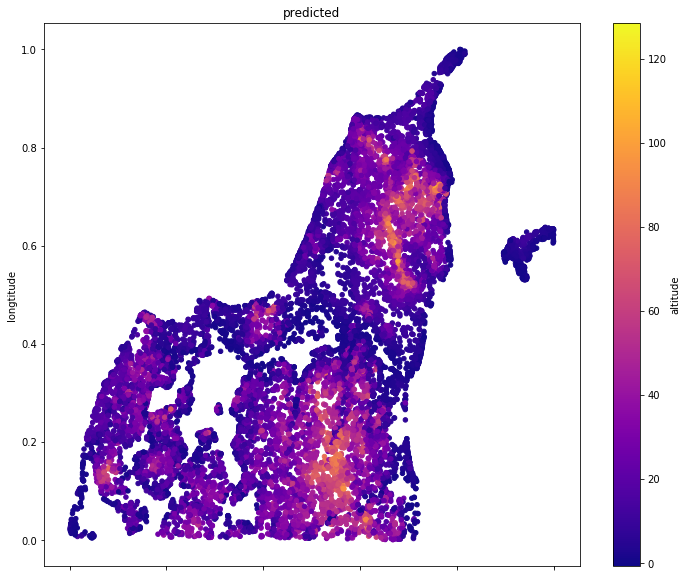

In [16]:
plot_altitude('predicted')

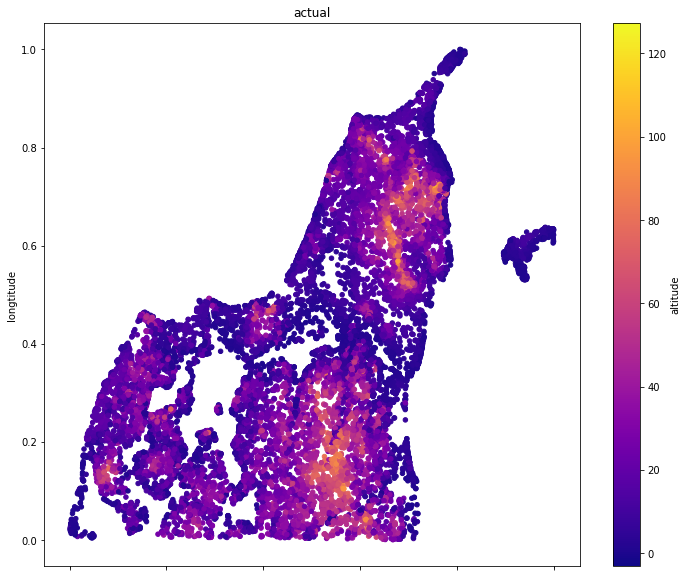

In [17]:
plot_altitude('actual')

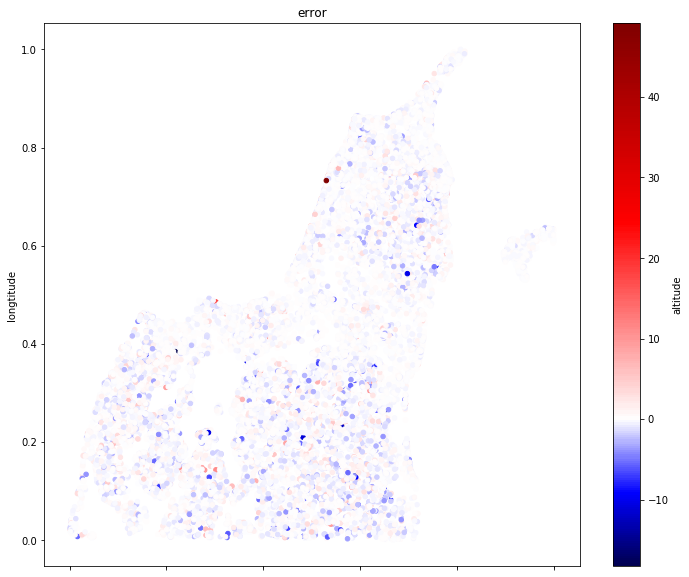

In [18]:
plot_error()

# Closing notes
---

![QR](https://bujniewicz.github.io/mdm-ml-for-developers/mdm-ml-url.svg)
### slides are on https://bujniewicz.github.io/mdm-ml-for-developers/
### code is on https://github.com/bujniewicz/mdm-ml-for-developers/
### questions?